In [236]:
import numpy as np
import pandas as pd
from math import e, inf, sqrt
import random
from PIL import Image
import matplotlib.pyplot as plt

# activation 
def sig(x):
    y = 1/(1 + np.exp(-x))
    return y

# activation gradient
def sigDeriv(x):
    y = sig(x)*(1-sig(x))
    return y
x = np.array([1,2,3])
sigDeriv(x)



array([0.19661193, 0.10499359, 0.04517666])

In [237]:
dat = pd.read_csv("handwritten digits (images).csv",dtype=int)
numOfDatasets = len(dat)
dat

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [238]:
TrainingData = pd.DataFrame(dat.iloc[:, 1:]).to_numpy(copy=True, dtype=np.int32)

# normalise data (make mean 0 and std 1)
mean = np.mean(TrainingData)
std = np.std(TrainingData)
TrainingData = (TrainingData - mean)/std
sum(TrainingData[0,:])

-121.28699186719702

correct ans: 1


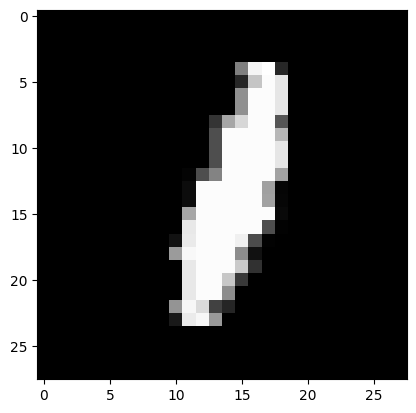

In [239]:
# used to test later 
def DataColToImage(x):
    image = Image.fromarray(TrainingData[x, :].reshape(28,28) * std + mean)
    plt.imshow(image)
    print("correct ans:", dat.iloc[x, 0])
DataColToImage(random.randint(0,42000))

In [240]:
TrainingData[1, :].shape

(784,)

In [241]:
# separate training and test data by indexes 
testNum = 6000
allIndex = list(range(0,42000))
trainIndex = []
for i in range(0, 42000 - testNum):
    x = random.randint(0, len(allIndex) - 1)
    trainIndex.append(allIndex[x])
    allIndex.pop(x)
testIndex = allIndex
print(len(testIndex))

6000


In [242]:
x = np.array([[1,2,3],
              [1,2,3]])

y = np.array([[1,2,3]])

y.shape

(1, 3)

In [243]:
inputNumber = 784
Hidden1NeuronCount = 110
Hidden2NeuronCount = 110 
outputCount = 10
learningRate = 0.1

# all weights from each row will lead to same neuron of the next layer 
# all weights from same column will act on same neuron of current layer
# first row weights are all weights that lead to first neuron in the next layer, etc
# first column weights are all weights that act on first neuron of current layer 
# weight.T = [all weights that act on first neuron of current layer]
#          [all weights that act on second neuron of current layer], etc...
# weight = [all weights that lead to first neuron of next layer]
#            [all weights that lead to second neuron of next layer], etc... 
# data will be a single column
# next layer calculated will be single column with all neurons (good)
# h,g,f,H,G,F == inactivated and activated hidden layers and final layers respectively

weights1 = np.random.uniform(-0.5,0.5,(Hidden1NeuronCount, inputNumber))
weights2 = np.random.uniform(-0.5,0.5,(Hidden2NeuronCount, Hidden1NeuronCount))
weights3 = np.random.uniform(-0.5,0.5,(outputCount, Hidden2NeuronCount))

biases1 = np.random.uniform(-0.1,0.1,(Hidden1NeuronCount, 1))
biases2 = np.random.uniform(-0.2,0.2,(Hidden2NeuronCount, 1))
biases3 = np.random.uniform(-0.3,0.3,(outputCount,1))

print(weights1.shape, weights2.shape, weights3.shape)
sig(weights1)

(110, 784) (110, 110) (10, 110)


array([[0.43568147, 0.55235744, 0.46109599, ..., 0.61741725, 0.59882326,
        0.39936147],
       [0.59143886, 0.54781985, 0.42083068, ..., 0.52971552, 0.53822884,
        0.54368518],
       [0.41630248, 0.43815433, 0.44411022, ..., 0.42573832, 0.42495664,
        0.46273006],
       ...,
       [0.53556996, 0.60548548, 0.54503398, ..., 0.39110657, 0.47023475,
        0.50976578],
       [0.41380667, 0.48495964, 0.48654415, ..., 0.4404749 , 0.54428264,
        0.39982002],
       [0.56512014, 0.61461567, 0.40024959, ..., 0.41073045, 0.47282409,
        0.4289675 ]])

In [244]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

def test():
    # single test
    randomTest = testIndex[random.randint(0, testNum-1)] # only uses testdata for testing dont use data that will be iused in raining 
    prams = forwardProp(randomTest, weights1, weights2, weights3, biases1, biases2, biases3)
    modelAns, hidden1, hidden2, finallayer, UnactivatedHidden1, UnativatedHidden2, UnactivatedFinalLayer, data = prams
    ans = finallayer
    cost = np.sum((modelAns - finallayer)**2)
    DataColToImage(randomTest)
    print("predicted:", ans.argmax())
    return ans

def testMany(n):
    # test a bunch for accuracy calculations 
    correct = 0
    wrong = 0
    for i in range(0, n):
        randomTest = testIndex[random.randint(0, testNum-1)] # only uses testdata for testing dont use data that will be iused in raining
        finallayer = forwardProp(randomTest, weights1, weights2, weights3, biases1, biases2, biases3)[3]
        ans = softmax(finallayer)
        pred = ans.argmax()
        corr = int(dat.iloc[randomTest, 0])
        if pred == corr:
            correct += 1
        else:
            wrong += 1
    print("accuracy:", str((correct/(correct + wrong))*100) + "%" , flush=False)



In [245]:
def forwardProp(x, weight1, weight2, weight3, bias1, bias2, bias3):
    # forward propagation 
    data = TrainingData[x,:].reshape(784,1)
    
    UnactivatedHidden1 = np.dot(weight1, data)
    hidden1 = sig(UnactivatedHidden1) + bias1

    UnativatedHidden2 = np.dot(weight2, hidden1)
    hidden2 = sig(UnativatedHidden2) + bias2

    UnactivatedFinalLayer = np.dot(weight3, hidden2)
    finalLayer = sig(UnactivatedFinalLayer) + bias3

    correctAns = dat.iloc[x,0]
    modelAns = np.zeros((1,10)) # create empty array
    modelAns[0,correctAns] = 1 # make the correct index become 1 rest remain 0
    return [modelAns, hidden1, hidden2, finalLayer, UnactivatedHidden1, UnativatedHidden2, UnactivatedFinalLayer, data]

forwardProp(41999, weights1, weights2, weights3, biases1, biases2, biases3) #[3].shape

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]]),
 array([[ 1.0291112 ],
        [-0.02223039],
        [ 0.06391781],
        [ 0.0927054 ],
        [-0.0396821 ],
        [ 0.93908663],
        [ 1.04895099],
        [ 0.00731594],
        [ 0.02572159],
        [ 0.91786041],
        [ 0.95874547],
        [ 0.99605799],
        [ 0.67514908],
        [ 0.96251376],
        [ 0.96447084],
        [ 0.95439024],
        [ 1.03470009],
        [ 0.06579116],
        [ 0.90669082],
        [ 0.00292118],
        [ 1.08504676],
        [ 0.11068966],
        [ 0.76562531],
        [ 0.17560962],
        [ 1.05270875],
        [ 0.85842568],
        [ 0.96008704],
        [ 0.05455237],
        [-0.05908425],
        [ 0.94689986],
        [ 0.86541189],
        [ 1.06481873],
        [ 0.50161062],
        [ 1.00175077],
        [ 0.13555297],
        [ 0.99532567],
        [ 1.08380661],
        [ 1.06902308],
        [ 0.77430619],
        [ 0.05638543],
        [ 0.10809778],
     

In [246]:
biases3



array([[ 0.0856157 ],
       [ 0.03083403],
       [-0.03242602],
       [ 0.06288447],
       [-0.03454765],
       [ 0.0798391 ],
       [ 0.17112036],
       [-0.26948965],
       [-0.14989237],
       [-0.16368799]])

In [247]:
x = np.array(([1,2,3],
             [1,2,3]))
np.sum(x, 0)

array([2, 4, 6])

In [248]:
# optimise weights 
def backProp(params):
# h,g,f,H,G,F == inactivated and activated hidden layers and final layers respectively
    global weights1, weights2, weights3, biases1, biases2, biases3
    modelAns, H, G, F, h, g, f, data = params
    modelAns = modelAns.reshape(10,1)
    cost = np.mean((modelAns - F)**2)
    print("cost:", cost)
    
    dCdF = -2*(modelAns - F)
    dCdf = dCdF * sigDeriv(f)

    dCdG = np.sum(dCdf * weights3, 0).reshape(Hidden2NeuronCount,1)

    dCostdWeights3 = np.ones_like(weights3) * G.reshape(1, Hidden2NeuronCount) * dCdf
    
    dGdg = sigDeriv(g)

    dCdH = np.sum((dGdg * dCdG) * weights2, 0).reshape(Hidden1NeuronCount,1)

    dCostdWeights2 = np.ones_like(weights2) * H.reshape(1, Hidden1NeuronCount) * dCdG * dGdg

    dHdh = sigDeriv(h)

    dCostdWeights1 = np.ones_like(weights1) * data.reshape(1, inputNumber) * dCdH * dHdh

    dCostdBiases3 = dCdF # this is prb not the gradient wrt to the bias but rather proportionate number to the amt u want the bias to change
    dCostdBiases2 = dCdG 
    dCostdBiases1 = dCdH
    weights3 -= dCostdWeights3 * learningRate
    weights2 -= dCostdWeights2 * learningRate
    weights1 -= dCostdWeights1 * learningRate
    biases3 -= dCostdBiases3 * learningRate
    biases2 -= dCostdBiases2 * learningRate
    biases1 -= dCostdBiases1 * learningRate
    return #cost

backProp(forwardProp(3, weights1, weights2, weights3, biases1, biases2, biases3))

cost: 0.22798042080974676


In [249]:
# train of some data 
for i in range(42000 - testNum):
    print(i)
    x = trainIndex[i] # dont train on testdata
    backProp(forwardProp(i, weights1, weights2, weights3, biases1, biases2, biases3))


0
cost: 0.17924097537546935
1
cost: 0.12078205381089205
2
cost: 0.08823338046297376
3
cost: 0.11841650862081794
4
cost: 0.10266282024665745
5
cost: 0.043293480615026234
6
cost: 0.10470652649066166
7
cost: 0.17307130855938757
8
cost: 0.1337092396089929
9
cost: 0.10237420693725427
10
cost: 0.09996090307228944
11
cost: 0.14956737519873067
12
cost: 0.16299334634922089
13
cost: 0.08875173212933476
14
cost: 0.05840928069511293
15
cost: 0.15056030174128704
16
cost: 0.1394488784598706
17
cost: 0.11702400240259514
18
cost: 0.12642530619378162
19
cost: 0.12659341673540048
20
cost: 0.11533092353391809
21
cost: 0.13444256416765354
22
cost: 0.10359885089856893
23
cost: 0.09621736480765722
24
cost: 0.04757000503416799
25
cost: 0.15489453268594994
26
cost: 0.1218951894161783
27
cost: 0.11200758858384068
28
cost: 0.0263675128149633
29
cost: 0.09968370357365987
30
cost: 0.17071913556032772
31
cost: 0.08233993267537204
32
cost: 0.15141767463370337
33
cost: 0.0826191589435886
34
cost: 0.07829779646415715

cost: 0.11611415410025752
56
cost: 0.07325040885367225
57
cost: 0.11573478943471374
58
cost: 0.08961411879063201
59
cost: 0.10034839163153837
60
cost: 0.06983600873092465
61
cost: 0.028241379794997867
62
cost: 0.1392156740625663
63
cost: 0.11585490940727945
64
cost: 0.11865674305616389
65
cost: 0.10805518005669601
66
cost: 0.10989145241009397
67
cost: 0.13276506382181327
68
cost: 0.08162631776106946
69
cost: 0.10554026807942522
70
cost: 0.1010603356749447
71
cost: 0.1128022341519532
72
cost: 0.11451588169125174
73
cost: 0.11318791611387771
74
cost: 0.06934201238225328
75
cost: 0.11266636148251016
76
cost: 0.10974930377270123
77
cost: 0.10180724636163352
78
cost: 0.06827500356431512
79
cost: 0.0652225175730912
80
cost: 0.13960447320871255
81
cost: 0.07818057206017096
82
cost: 0.11356449712604952
83
cost: 0.11531919524643501
84
cost: 0.11760384862797543
85
cost: 0.07747057144940009
86
cost: 0.0414600036466177
87
cost: 0.11944062155585859
88
cost: 0.049034315278592415
89
cost: 0.132875270

correct ans: 5
predicted: 5
accuracy: 94.74000000000001%


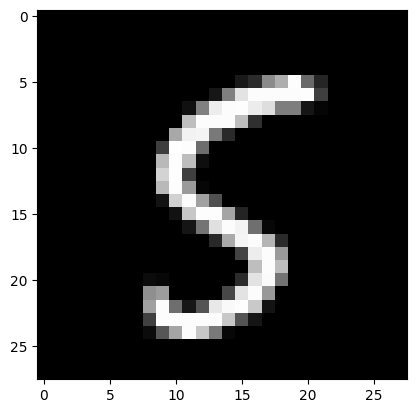

In [253]:
test() # do one to visualise 
testMany(5000) # do many for accuracy calculation (separate into different cells later in case want to test 1 multiple times just to see)